# Group spectral-peak detections on all geophone stations by time and frequency

In [7]:
# Imports
from os.path import join
from numpy import linspace
from pandas import read_csv, date_range, Timestamp, Timedelta

from utils_basic import SPECTROGRAM_DIR as indir, GEO_STATIONS as stations
from utils_spec import assemble_spec_filename, group_spectral_peaks, read_geo_spectrograms, find_geo_station_spectral_peaks
from utils_plot import plot_array_spec_peak_detect_counts, save_figure

In [8]:
# Inputs
# Data
window_length = 60.0
overlap = 0.0
downsample = True
downsample_factor = 60
prom_threshold = 5
rbw_threshold = 0.2

# Grouping
starttime = "2020-01-10T00:00:00"
endtime = "2020-02-02T00:00:00"

time_bin_width = "1min"
freq_bin_width = 1.0 # in Hz
min_freq = 0.0
max_freq = 500.0

# Plotting
min_count = 0
max_count = 35

In [17]:
# Read the spectral peaks
filename = f"geo_spectral_peaks_window{window_length:.0f}s_overlap{overlap:.1f}_prom{prom_threshold:.0f}db_rbw{rbw_threshold:.1f}.csv"
inpath = join(indir, filename)
peak_df = read_csv(inpath, parse_dates=["time"], date_parser =  index_col = 0)

In [15]:
print(peak_df.head())

   frequency                 time      power  reverse_bandwidth station
0      134.0  2020-01-10 07:23:44  40.895400           0.250000     A01
1      160.0  2020-01-10 07:23:44  35.472318           0.333333     A01
2      179.0  2020-01-10 07:23:44  36.622596           0.200000     A01
3      225.0  2020-01-10 07:23:44  28.109524           0.200000     A01
4      239.0  2020-01-10 07:23:44  27.847649           0.250000     A01


In [12]:
# Group the spectral peaks
time_bin_centers, freq_bin_centers, detect_counts = group_spectral_peaks(peak_df, starttime, endtime, time_bin_width = time_bin_width, freq_bin_width = freq_bin_width, min_freq = min_freq, max_freq = max_freq)

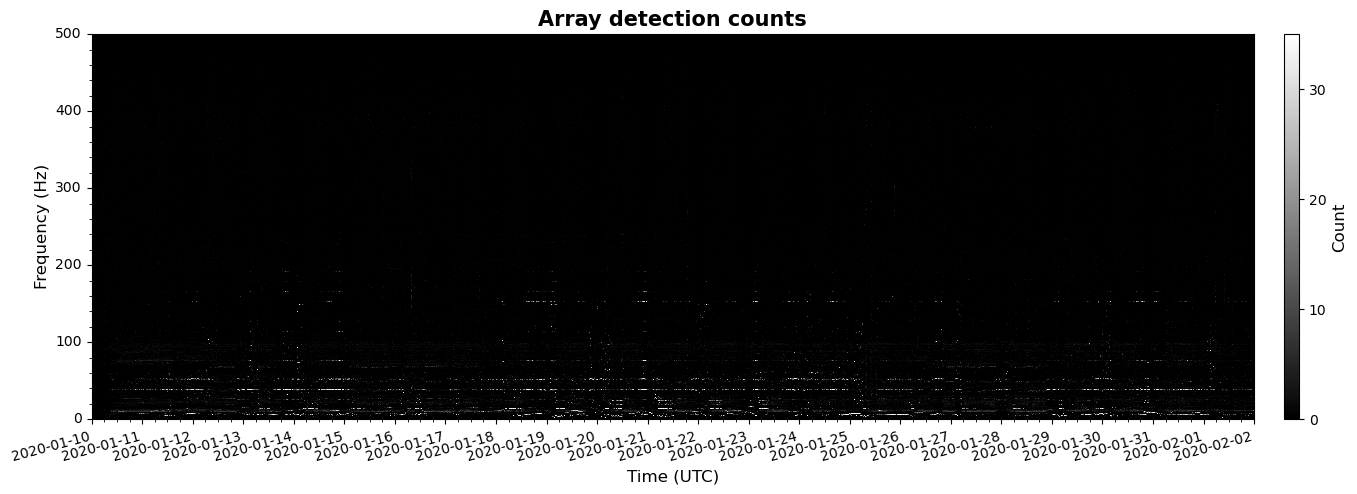

In [5]:
# Plot the results
fig, ax, cbar = plot_array_spec_peak_detect_counts(time_bin_centers, freq_bin_centers, detect_counts, min_count = min_count, max_count = max_count, date_format = "%Y-%m-%d", major_time_spacing = 24, minor_time_spacing = 6)

In [6]:
# Save the figure
figname = f"geo_array_spectral_peak_detections_{time_bin_width}.png"
save_figure(fig, figname)

Figure saved to /fp/projects01/ec332/data/figures/geo_array_spectral_peak_detections_1min.png
